In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

### 1. 데이터셋 불러오기

In [2]:
# load_dataset() 메서드는 데이터프레임 객체를 리턴한다.
titanic = sns.load_dataset('titanic')

### 2. feature 분석

In [3]:
# 2-1. head 함수를 이용해 데이터프레임의 첫 5행을 출력하기
# head() 함수에 인자로 출력할 개수를 넣어 준다. 여기서는 5행이므로 5를 넣으면 된다.
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 2-2, 2-3. describe 함수 사용하기 및 행 인덱스에 대한 설명
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe() 메서드는 수치형 타입을 가진 열에 대해서 간단한 통계값들을 보여준다.<br>
이때 모든 통계값을 산출할 때 NaN(또는 Null) 값은 계산 범위에 포함하지 않고 적용한다는 점을 유념하자.
- count: 해당 열에 있는 값 전체의 개수를 센다.
- mean: 해당 열에 있는 값 전체를 합한 후, 값의 개수만큼 나눈다. 
- std: 해당 열에 있는 값의 표준편차를 말한다. (다만 일반적인 공식과 살짝 다르다. 아래 참조.)
$$ {\rm std} = \sqrt{{\sum({\rm data} - {\rm mean})^2 \over ({\rm count} - 1)}} ~~~~~
\text{(만약, 데이터의 개수가 1개라면, std의 결과는 NaN이 된다. (Divide By Zero))}$$

- min, max: 각각 최솟값과 최댓값을 말한다.
- 25%, 50%, 75%: 값을 오름차순으로 정렬한 후 4등분 했을 때 각각 1/4, 1/2, 3/4 자리의 값이다.<br>
  boxplot을 활용하면 이 값을 시각적으로 확인하기 좋다.

**사분위수와 boxplot**

1) 중앙값(Median): 데이터를 정렬했을 때 정확히 절반으로 나눌 수 있는 값을 말한다.<br>
전체 데이터의 개수가 홀수인 경우 중앙값은 1개가 되며 짝수일 경우 50%에 가장 가까운 2개 값의 평균을 중앙값으로 하는 것이 일반적이다.
2) 박스(Box): 데이터의 25%(Q1) ~ 75%(Q3) 까지의 값들을 박스로 둘러 놓는다.
3) 수염(Whiskers): 박스의 각 모서리 (Q1, Q3)로부터 IQR(Q3 ~ Q1)의 1.5배 내에 있는 가장 멀리 떨어진 데이터 점까지 이어져 있는 것을 수염이라 한다.
4) 이상치(Outlier): 수염(whiskers)보다 바깥쪽에 데이터가 존재한다면, 이것은 이상치로 분류된다.

<div align='center'><img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99D3C43359C2943722' width=20%></div>

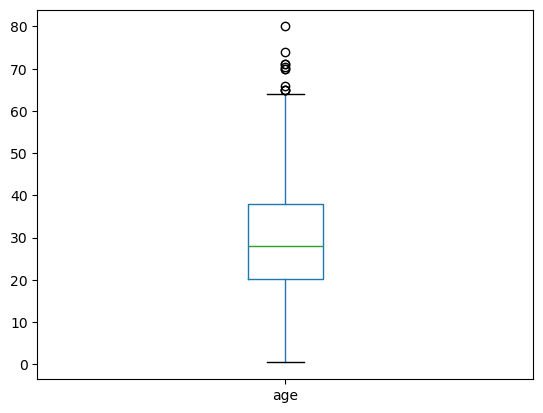

In [5]:
import matplotlib.pyplot as plt

titanic[['age']].boxplot(grid=False)
plt.show()

In [6]:
# 2-4. isnull() 함수와 sum() 함수를 이용해 각 열의 결측치 갯수를 확인하기

# isnull() 메서드는 모든 셀에 대해 그것이 null 혹은 NaN인지를 확인하여
# 맞다면 True, 그렇지 않다면 False가 해당 셀마다 각각 채워진 데이터프레임 객체를 리턴한다.

tt_nulls = titanic.isnull()
tt_nulls

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# 이제 isnull() 메서드로 만든 객체에 대해 행 인덱스가 나열된 방향(axis=0)으로 데이터를 확인하며 개수를 세면 된다.
# 여기서 bool 타입을 숫자로 할 때, True는 1, False는 0으로 치환될 수 있으며
# 해당되는 데이터만 결과적으로 1로 만들고 아닌 것은 0으로 하여 더하기 때문에, 해당되는 것만 개수를 세는 것과 같은 동작을 하게 된다.

tt_nulls.sum(axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 3. feature engineering

In [5]:
#3-1. 결측치 처리

#age의 결측치는 중앙값
#embarked의 결측치는 최빈값으로 대체
titanic['age'].fillna(titanic['age'].mean(),inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

#isnull()과 sum()함수를 이용해 결측치처리가 제대로 진행되었는지 확인
#결과에서 age와 embarked가 0이라면 결측치처리가 제대로 진행됨
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#3-2. 수치형으로 인코딩

#map을 사용
#sex를 male은 0, female은 1로 변환
#embarked는 C는 0, Q는 1, S는 2로 변환
titanic['sex']=titanic['sex'].map({'male':0,'female':1})
titanic['embarked']=titanic['embarked'].map({'C':0,'Q':1,'S':2})

#head를 이용하여 인코딩 결과 확인
#위의 인코딩 전의 head와 비교했을 때 이상없이 인코딩이 완료되었음을 확인
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [7]:
#아예 set을 이용해 중복값을 제외한 데이터프레임의 모든 값을 출력해보는 방법도 있다. 
#아래의 경우 embarked에 0,1,2의 값만 존재
#sex에 0,1만 존재
#즉 기존의 값이 모두 수치형으로 인코딩 된 것을 확인
print(set(titanic['embarked']))
print(set(titanic['sex']))

{0, 1, 2}
{0, 1}


In [8]:
#3-3. 새로운 feature 생성

#각각의 탑승객에 대해 sibsp(동승한 자매, 배우자의 수)+parch(동승한 부모자식수)로
#feature family_size(가족크기) 생성
titanic['family_size']=titanic['sibsp']+titanic['parch']

#head를 이용해 새로운 feature가 정상적으로 생성되었는지 확인
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False,1
1,1,1,1,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,1,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,1,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False,1
4,0,3,0,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True,0


In [9]:
#사전에 확인해본 결과 (alone==True)와 (parch와 sibsp가 모두 0)는 필요충분조건
#alone==True면 parch와 sibsp가 모두 0이고, parch와 sibsp가 모두 0이면 alone==True

#인코딩 확인사살
#alone==True인 사람들만 모아 family_size를 sum해봤을때 0이 나와야 함
#alone==False이면서 family_size가 0인 사람은 없음
print("alone family size:",titanic[titanic['alone']]['family_size'].sum())
titanic[~(titanic['alone']) & (titanic['family_size']==0)]

alone family size: 0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size


#### age와 embarked의 결측치 처리
- age: 평균값
- embarked: 최빈값

#### sex와 embarked의 인코딩
- sex: male:0, female:1
- embarked: C:0, Q:1, S:2

#### family_size=sibsp+parch
- 가족크기
- dtype: int64